In [1]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import mglearn
from pandas.plotting import scatter_matrix
from sklearn.model_selection import train_test_split

<b>linear models are also extensively used for classification</b>

### **Binary Classification**

* formula : <b>y = w[0] + x[0] + w[1] + x[1] + ... + w[p] + x[p] + b > 0</b>

In [2]:
from sklearn.linear_model import LogisticRegression
from sklearn.svm import LinearSVC

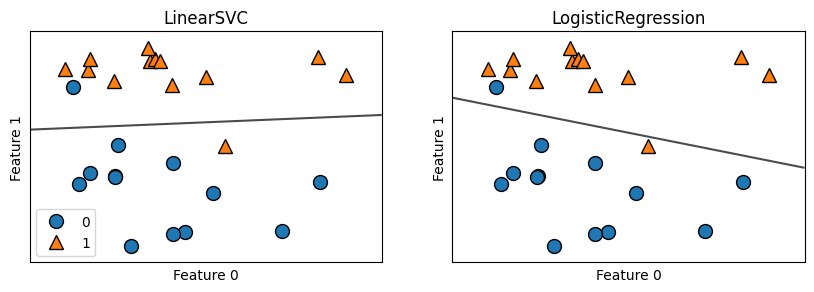

In [3]:
X,y = mglearn.datasets.make_forge()
flg,axes = plt.subplots(1,2,figsize=(10,3))
for model, ax in zip([LinearSVC(),LogisticRegression()],axes):
    clf = model.fit(X,y)
    mglearn.plots.plot_2d_separator(clf,X,fill=False,eps=0.5,ax=ax,alpha=.7)
    mglearn.discrete_scatter(X[:, 0],X[:, 1],y,ax=ax)
    ax.set_title("{}".format(clf.__class__.__name__))
    ax.set_xlabel("Feature 0")
    ax.set_ylabel("Feature 1")
axes[0].legend()

<b>decision boundaties of a linear SVM and logistic regression on the forge dataset with default parameter</b>

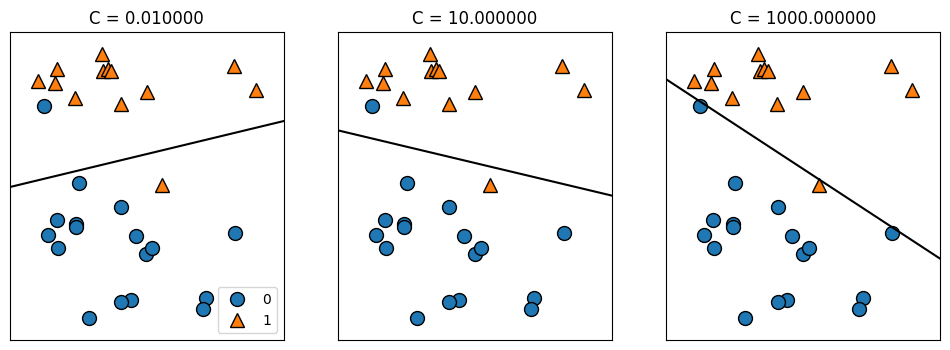

In [4]:
mglearn.plots.plot_linear_svc_regularization()

<b>decision boundaries of a linear SVM on the forge dataset for different values of C</b>

**let's analyze Linear Regression in more detail on the Breast Cancer dataset**

In [5]:
from sklearn.datasets import load_breast_cancer
cancer = load_breast_cancer()
X_train,X_test,y_train,y_test = train_test_split(cancer.data,cancer.target,stratify=cancer.target,random_state=42)

In [6]:
logreg = LogisticRegression(max_iter=10000).fit(X_train,y_train)

In [7]:
print("Training set score: {:.3f}".format(logreg.score(X_train,y_train)))
print("Test set score: {:.3f}".format(logreg.score(X_test,y_test)))

Training set score: 0.958
Test set score: 0.958


<b>let's try to increase C to fit a more flexible model.</b>

In [8]:
logreg100 = LogisticRegression(C=100, max_iter=100000).fit(X_train,y_train)
print("Training set score: {:.3f}".format(logreg100.score(X_train,y_train)))
print("Test set score: {:.3f}".format(logreg100.score(X_test,y_test)))

Training set score: 0.979
Test set score: 0.965


<b>now setting c to 0.01</b>

In [9]:
logreg001 = LogisticRegression(C=0.001,max_iter=100000).fit(X_train,y_train)
print("Training set score: {:.3f}".format(logreg001.score(X_train,y_train)))
print("Test set score: {:.3f}".format(logreg001.score(X_test,y_test)))

Training set score: 0.953
Test set score: 0.944


<b>let's look at the coeffficients learned by the models with the three different settings of the regularization parameter C</b>

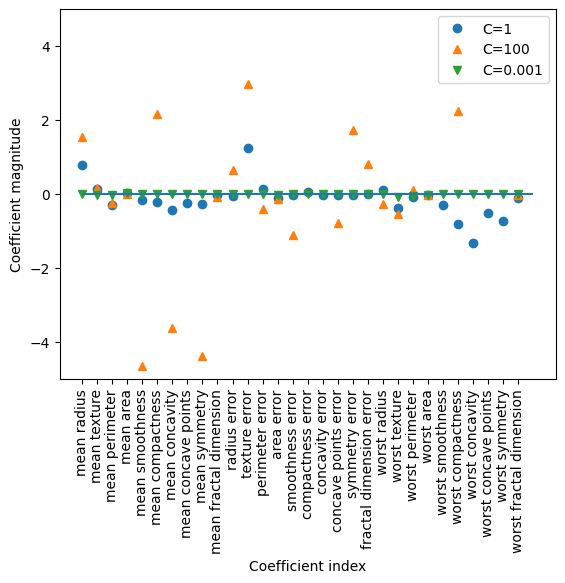

In [10]:
plt.plot(logreg.coef_.T,'o',label="C=1")
plt.plot(logreg100.coef_.T,'^',label="C=100")
plt.plot(logreg001.coef_.T,'v',label="C=0.001")
plt.xticks(range(cancer.data.shape[1]), cancer.feature_names, rotation=90)
plt.hlines(0,0,cancer.data.shape[1])
plt.ylim(-5,5)
plt.xlabel("Coefficient index")
plt.ylabel("Coefficient magnitude")
plt.legend()

<b>now let's look at the coefficient learned by the logistic regression with L1 penalty on the Breast cancer dataset for different values of C</b>

Training accuracy of l1 logreg with C=0.001: 0.91
Test accuracy of l1 logred with C=0.001: 0.92
Training accuracy of l1 logreg with C=1.000: 0.96
Test accuracy of l1 logred with C=1.000: 0.96
Training accuracy of l1 logreg with C=100.000: 0.99
Test accuracy of l1 logred with C=100.000: 0.98


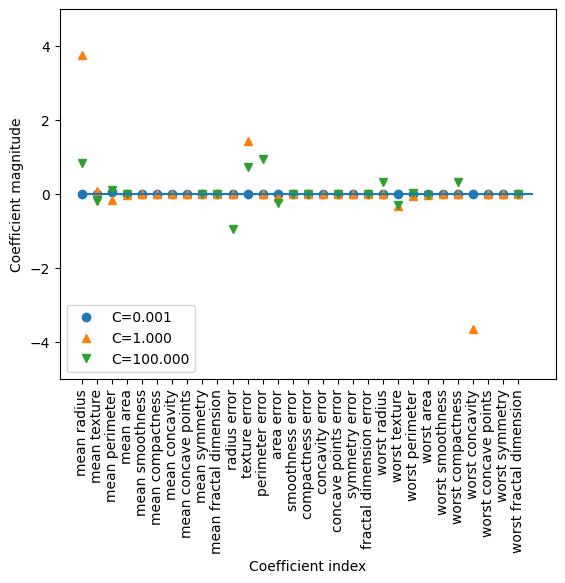

In [11]:
for C,marker in zip([0.001,1,100],['o','^','v']):
    lr_l1 = LogisticRegression(C=C,penalty="l1",solver='liblinear',max_iter=100000).fit(X_train,y_train)
    print("Training accuracy of l1 logreg with C={:.3f}: {:.2f}".format(C,lr_l1.score(X_train,y_train)))
    print("Test accuracy of l1 logred with C={:.3f}: {:.2f}".format(C,lr_l1.score(X_test,y_test)))
    plt.plot(lr_l1.coef_.T,marker,label="C={:.3f}".format(C))
plt.xticks(range(cancer.data.shape[1]),cancer.feature_names, rotation=90)
plt.hlines(0,0, cancer.data.shape[1])
plt.xlabel("Coefficient index")
plt.ylabel("Coefficient magnitude")

plt.ylim(-5,5)
plt.legend(loc=3)

<hr>

### **Linear models for multiclass classification**

<b>w[0] * x[0] + w[1] * x[1] + .... + w[p] * x[p] + b</b>

In [12]:
from sklearn.datasets import make_blobs

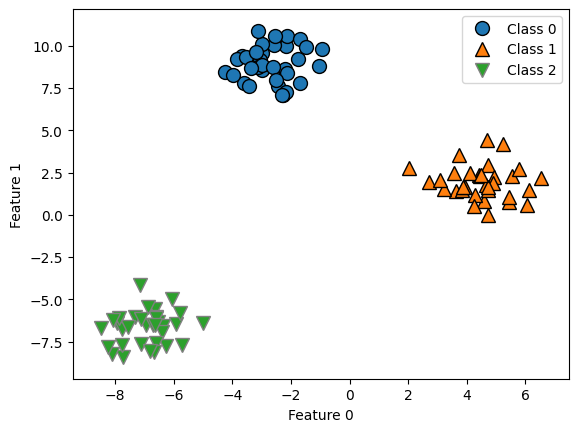

In [13]:
X,y = make_blobs(random_state=42)
mglearn.discrete_scatter(X[:, 0], X[:, 1], y)
plt.xlabel("Feature 0")
plt.ylabel("Feature 1")
plt.legend(["Class 0","Class 1","Class 2"])

<b>now we train a LinearSVC classifier on the dataset</b>

In [14]:
linear_svm = LinearSVC().fit(X,y)
print("Coefficeint shape: ",linear_svm.coef_.shape)
print("Intercept shape: ",linear_svm.intercept_.shape)

Coefficeint shape:  (3, 2)
Intercept shape:  (3,)


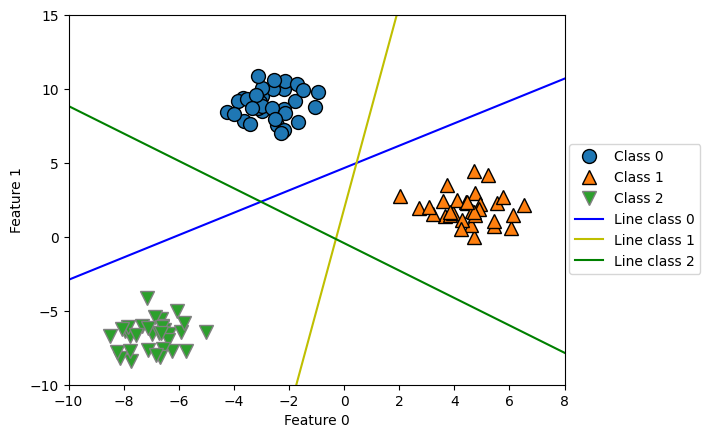

In [15]:
mglearn.discrete_scatter(X[:, 0], X[:, 1],y)
line = np.linspace(-15,15)
for coef,intercept,color in zip(linear_svm.coef_,linear_svm.intercept_,['b','y','g']):
    plt.plot(line,-(line*coef[0]+intercept)/coef[1],c=color)
plt.ylim(-10,15)
plt.xlim(-10,8)
plt.xlabel("Feature 0")
plt.ylabel("Feature 1")
plt.legend(['Class 0','Class 1','Class 2','Line class 0','Line class 1','Line class 2'],loc=(1.01,0.3))

Text(0, 0.5, 'Feature 1')

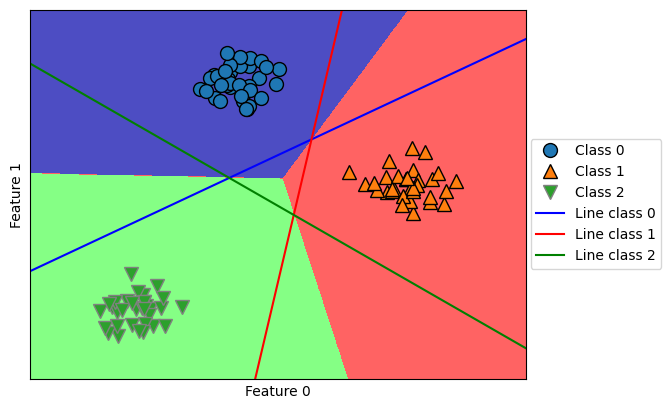

In [18]:
mglearn.plots.plot_2d_classification(linear_svm,X,fill=True,alpha=.7)
mglearn.discrete_scatter(X[:, 0], X[:, 1], y)
line = np.linspace(-15,15)
for coef,intercept,color in zip(linear_svm.coef_,linear_svm.intercept_,['b','r','g']):
    plt.plot(line,-(line * coef[0] + intercept)/coef[1],c=color)
plt.legend(['Class 0', 'Class 1', 'Class 2', 'Line class 0', 'Line class 1', 'Line class 2'],loc=(1.01,0.3))
plt.xlabel("Feature 0")
plt.ylabel("Feature 1")